In [ ]:
using CSV
using DataFrames
using Dates
using Plots
using Gadfly

In [ ]:
questionsData = CSV.File("questions.csv", dateformat="yyyy-mm-dd HH:MM:SS")
df = DataFrame(questionsData)
# parse into DateTime objects

datetime_vec =  df[!, "AskedOnUtc"]

# create a vector of hours from the DateTime objects
hour_vec = hour.(datetime_vec)
histogram(hour_vec, bins=0:23, xticks=0:23, xtickfont=7, label = "User Question Time Series")

answerData = CSV.File("attorneytimeentries.csv")
df1 = DataFrame(answerData)
# parse into DateTime objects

datetime_vec_ans = map(x -> DateTime(x, "yyyy-mm-dd HH:MM:SS"), df1[!, "EnteredOnUtc"])

# create a vector of hours from the DateTime objects
hour_vec_ans = hour.(datetime_vec_ans)
histogram!(hour_vec_ans, bins=0:23, xticks=0:23, xtickfont=7, label="Attorney Entry Time Series")
title!("Frequencies used in different hours")
xlabel!("Hour of day")
ylabel!("Question/Answer frequency")




In [ ]:
dayofweek_vec = dayofweek.(datetime_vec)
# Convert to vector of integers representing day of the week

# Create histogram
histogram(dayofweek_vec, bins=7, xticks=(1:7, ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]), label = "User activities")

dayofweek_vec_ans = dayofweek.(datetime_vec_ans)
# Create histogram
histogram!(dayofweek_vec_ans, bins=7, xticks=(1:7, ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]), label = "Attorney activities")
xlabel!("Day of week")
ylabel!("Frequency")

In [ ]:
questionsData = CSV.File("questions.csv", dateformat="yyyy-mm-dd HH:MM:SS")
df = DataFrame(questionsData)
df.AskedOnUtc = month.(df.AskedOnUtc)
grouped = groupby(df, [:AskedOnUtc, :Category])
grouped_data = combine(grouped, nrow => :count)
data = groupby(grouped_data, :Category)
print(data)


















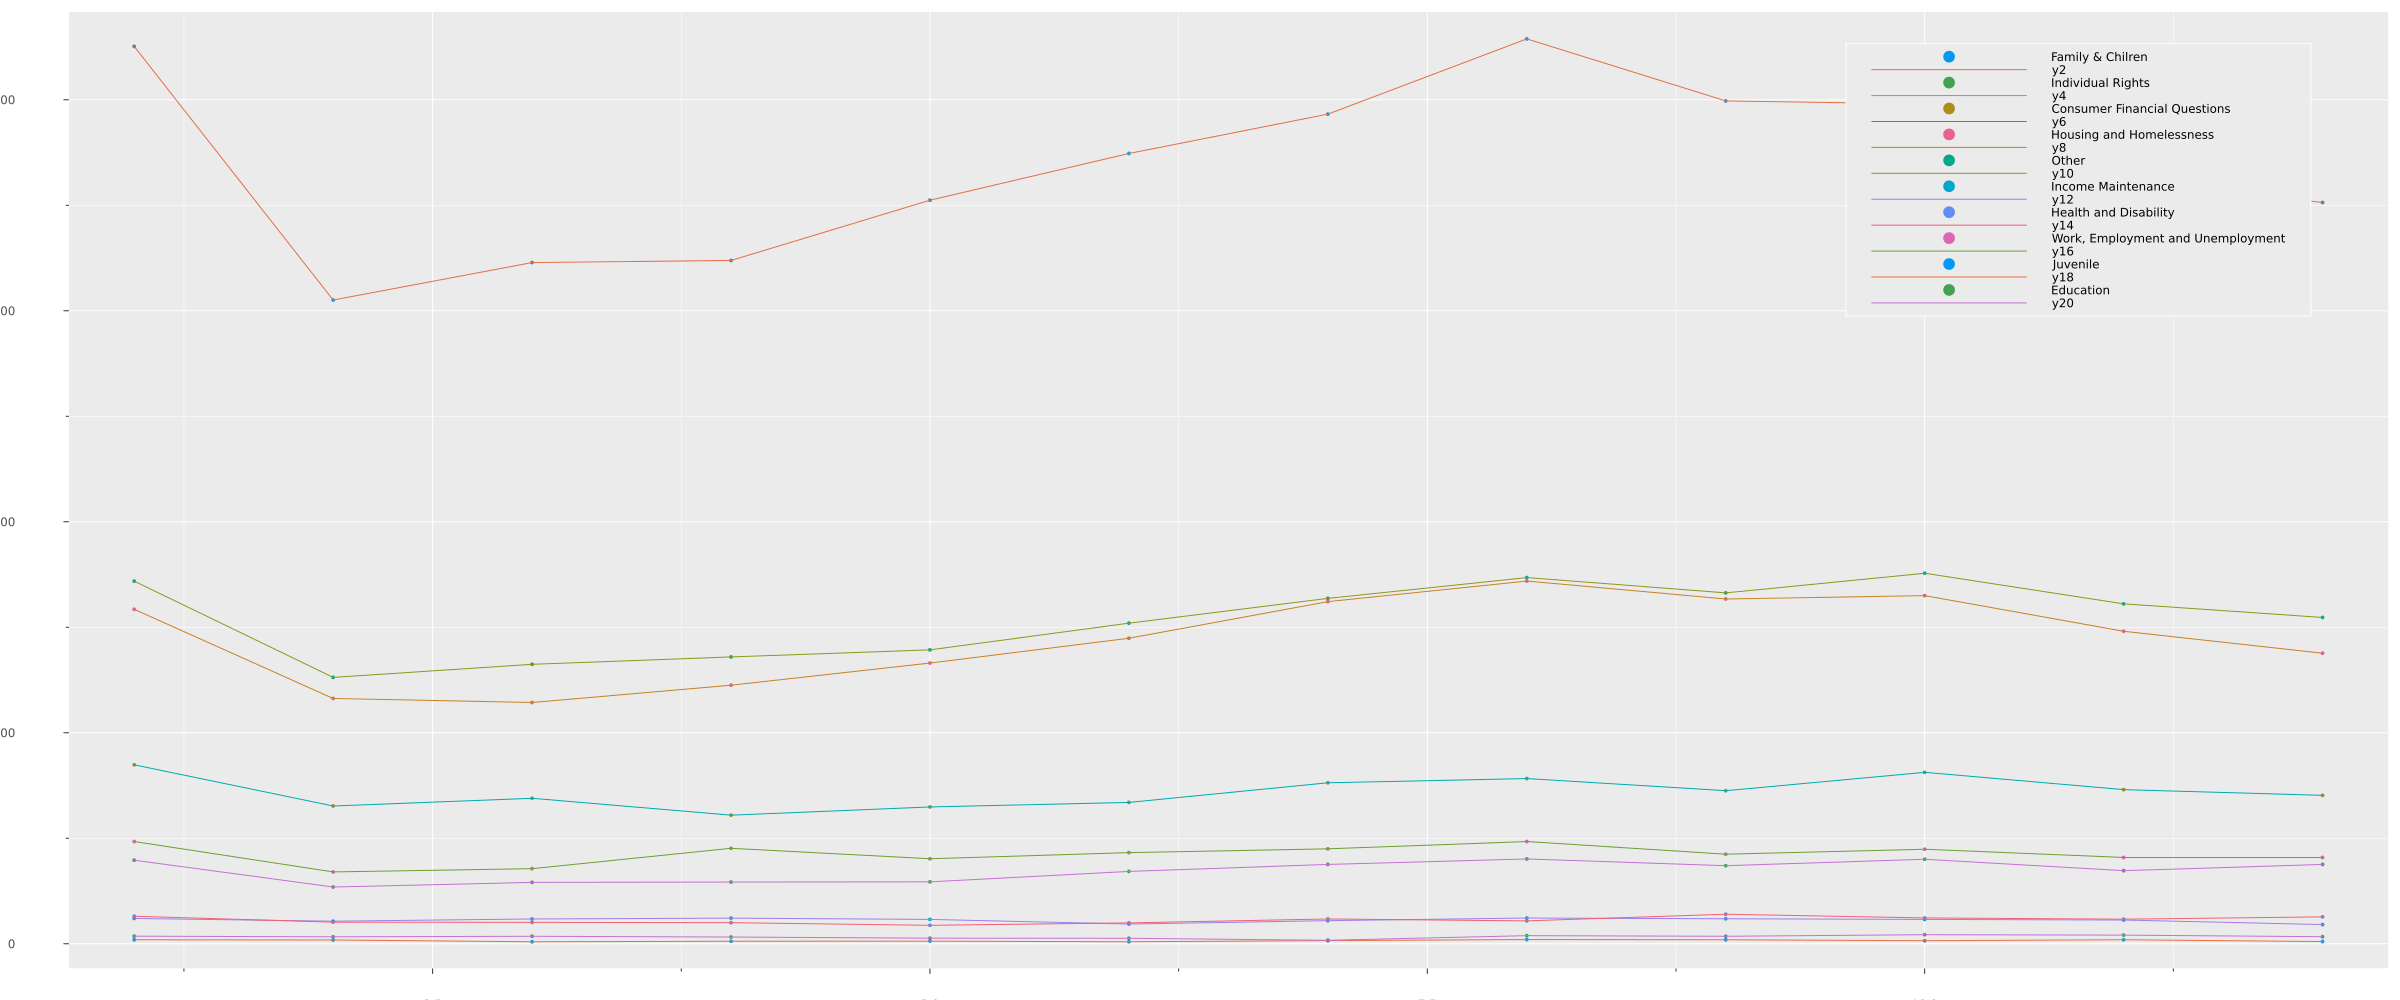

In [279]:

theme(:ggplot2)

scatter( data[1].AskedOnUtc, data[1].count, label = "Family & Chilren", markersize = 2, size = 1000)
plot!(data[1].AskedOnUtc, data[1].count)
scatter!( data[2].AskedOnUtc, data[2].count, label = "Individual Rights", markersize = 2)
plot!(data[2].AskedOnUtc, data[2].count)
scatter!( data[3].AskedOnUtc, data[3].count, label = "Consumer Financial Questions", markersize = 2 )
plot!(data[3].AskedOnUtc, data[3].count)
scatter!( data[4].AskedOnUtc, data[4].count, label = "Housing and Homelessness", markersize = 2 )
plot!(data[4].AskedOnUtc, data[4].count)
scatter!( data[5].AskedOnUtc, data[5].count, label = "Other", markersize = 2 )
plot!(data[5].AskedOnUtc, data[5].count)
scatter!( data[6].AskedOnUtc, data[6].count, label = "Income Maintenance", markersize = 2 )
plot!(data[6].AskedOnUtc, data[6].count)
scatter!( data[7].AskedOnUtc, data[7].count, label = "Health and Disability", markersize = 2 )
plot!(data[7].AskedOnUtc, data[7].count)
scatter!( data[8].AskedOnUtc, data[8].count, label = "Work, Employment and Unemployment", markersize = 2 )
plot!(data[8].AskedOnUtc, data[8].count)
scatter!( data[9].AskedOnUtc, data[9].count, label = "Juvenile", markersize = 2 )
plot!(data[9].AskedOnUtc, data[9].count)
scatter!( data[10].AskedOnUtc, data[10].count, label = "Education",markersize = 2  )
plot!(data[10].AskedOnUtc, data[10].count, size=(2400,1000), fmt = :png)


